# 蒙特卡罗方法与期权定价

## 概览

通过以下方式，我们可以进行简单的概率计算：

* 用笔和纸，
* 查询著名的概率分布，
* 逻辑推理。

例如，我们可以轻松地计算出：

* 一枚普通的硬币，抛五次中出现三次正面的概率
* 一个随机变量的期望值，如果这一随机变量有 $1/2$ 的概率等于 $-10$，有 $1/2$ 的概率等于 $100$。

但是，有些概率计算非常复杂。

在经济和金融问题中，经常需要计算复杂的概率和期望值。

处理复杂概率计算，最重要的工具之一是[蒙特卡罗方法](https://baike.baidu.com/item/%E8%92%99%E7%89%B9%E5%8D%A1%E7%BD%97%E6%B3%95/1225057)。

在本节讲座中，我们将介绍如何使用蒙特卡罗方法计算期望值，以及其在金融中的应用。

以下是必要的模块导入：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy.random import randn

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

## 蒙特卡罗简介

在本小节中，我们将描述如何使用蒙特卡罗方法计算期望值。

### 给定分布的股票价格

假设我们正在考虑购买某公司的股票。

我们的计划是：

1. 现在买入股票，持有一年后再卖出，或者
2. 用我们的钱做其他事情。

首先，我们将一年后的股票价格视为一个随机变量 $S$。

在决定是否购买股票之前，我们需要知道 $S$ 分布的一些特性。

例如，假设 $S$ 的均值相对于购买股票的价格很高。

这表明我们很有机会以相对较高的价格卖出。

但是，假设 $S$ 的方差也很高。

这表明购买股票有风险，我们或许应该放弃买入。

不论何种方式，上述讨论说明理解 $S$ 的分布的重要性。

假设，在分析数据后，我们猜想 $S$ 很好地由参数为 $\mu, \sigma$ 的对数正态分布表示。

* $S$ 与 $\exp(\mu + \sigma Z)$ 分布相同，其中 $Z$ 符合标准正态分布。
* 我们将此记作 $S \sim LN(\mu, \sigma)$。

所有关于统计的优质参考资料（如 [百度百科](https://baike.baidu.com/item/%E5%AF%B9%E6%95%B0%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83/8976782)）都会告诉我们，其均值和方差为

$$
    \mathbb E S
        = \exp \left(\mu + \frac{\sigma^2}{2} \right)
$$

和

$$
    \mathop{\mathrm{Var}} S
    = [\exp(\sigma^2) - 1] \exp(2\mu + \sigma^2)
$$

至此，我们还不需要使用计算机。



### 未知分布的股票价格

假设我们希望更仔细地研究股票价格 $S$ 的分布。

我们假设股票价格取决于三个变量，$X_1$、$X_2$ 和 $X_3$（例如，销售额、通货膨胀和利率）。

具体而言，我们的研究发现：

$$
    S = (X_1 + X_2 + X_3)^p
$$

其中：

* $p$ 是一个已知的正数（即已被估计），
* $X_i \sim LN(\mu_i, \sigma_i)$，当 $i=1,2,3$时，
* $\mu_i, \sigma_i$ 的值也是已知的，
* 随机变量 $X_1$、$X_2$ 和 $X_3$ 是相互独立的。

我们应该如何计算 $S$ 的均值？

仅仅依靠纸笔进行计算是十分困难的（除了$p=1$）。

但幸运地，我们至少有一种简便的方法可以近似地做到。

这就是蒙特卡洛方法，其操作步骤如下：

1. 在计算机上生成 $n$ 次独立抽取的 $X_1$、$X_2$ 和 $X_3$，
1. 使用这些抽取值生成 $n$ 次独立抽取的 $S$，
1. 取这些 $S$ 的抽取值的平均值。

当 $n$ 很大时，这个平均值将接近真实的平均值。

这归因于大数定律，我们在 {doc}`lln_clt` 中讨论过。

我们为 $p$ 和每个 $\mu_i$ 和 $\sigma_i$使用以下赋值。

In [2]:
n = 1_000_000
p = 0.5
μ_1, μ_2, μ_3 = 0.2, 0.8, 0.4
σ_1, σ_2, σ_3 = 0.1, 0.05, 0.2

#### 使用Python循环的一种例程

这里是一个使用Python原生循环，计算期望平均值的例程

$$
    \frac{1}{n} \sum_{i=1}^n S_i
    \approx \mathbb E S
$$

In [3]:
%%time

S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    X_2 = np.exp(μ_2 + σ_2 * randn())
    X_3 = np.exp(μ_3 + σ_3 * randn())
    S += (X_1 + X_2 + X_3)**p
S / n

CPU times: user 3.66 s, sys: 0 ns, total: 3.66 s
Wall time: 3.66 s


2.229789657599422

我们还可以构建一个包含这些操作的函数：

In [4]:
def compute_mean(n=1_000_000):
    S = 0.0
    for i in range(n):
        X_1 = np.exp(μ_1 + σ_1 * randn())
        X_2 = np.exp(μ_2 + σ_2 * randn())
        X_3 = np.exp(μ_3 + σ_3 * randn())
        S += (X_1 + X_2 + X_3)**p
    return (S / n)

现在调用函数。

In [5]:
compute_mean()

2.2296573787465874

### 一种向量化的例程

如果我们想要更准确的估计，我们应该增加$n$的大小。

但是上面的代码运行速度相当慢。

为了让它运行更快，我们使用 NumPy 来实现向量化例程。

In [6]:
def compute_mean_vectorized(n=1_000_000):
    X_1 = np.exp(μ_1 + σ_1 * randn(n))
    X_2 = np.exp(μ_2 + σ_2 * randn(n))
    X_3 = np.exp(μ_3 + σ_3 * randn(n))
    S = (X_1 + X_2 + X_3)**p
    return S.mean()

In [7]:
%%time

compute_mean_vectorized()

CPU times: user 81.4 ms, sys: 5.01 ms, total: 86.4 ms
Wall time: 85.9 ms


2.2296147546543463

我们注意到这个例程运行起来快得多。

我们可以通过增加 $n$ 来提高精度，但仍保持合理的速度：

In [8]:
%%time

compute_mean_vectorized(n=10_000_000)

CPU times: user 801 ms, sys: 43 ms, total: 844 ms
Wall time: 843 ms


2.2297261304249245

## 利用风险中性定价欧式看涨期权

接下来，我们将在风险中性的假设下对欧式看涨期权进行定价。

首先我们将讨论风险中性，然后考虑欧式期权。



### 风险中性定价

当我们使用风险中性定价时，我们根据给定资产的预期收益来决定其价格：

$$
\text{成本} = \text{预期收益}
$$

例如，假设有人承诺在抛硬币中支付你

- 1,000,000 美元，如果结果为正面
- 0 美元，如果结果为反面

我们将受益记作 $G$, 则

$$
    \mathbb P\left\{G = 10^6 \right\} = \mathbb P\{G = 0\} = \frac{1}{2}
$$

假设除此之外，你可以将这一承诺卖给任何需要它的人。

- 首先他们要支付给你 $P$，即你的销售价格
- 然后他们获得 $G$，可能是1,000,000 或者0。

那这一资产（这个承诺）的价格定为多少，是公平的？

“公平”的定义是模糊的，但我们可以说它的
**风险中性价格**是50万美元。

这是因为风险中性价格仅仅是资产的预期收益，即

$$
    \mathbb E G = \frac{1}{2} \times 10^6 + \frac{1}{2} \times 0 = 5 \times 10^5
$$


### 关于风险的提示

如名称所示，风险中性定价不考虑风险。

要理解这一点，思考你是否愿意为这样一个承诺支付500,000美元。

你是更愿意收到确定的500,000美元，还是有50%的概率收到1,000,000美元，而另外50%的概率空手而归？

至少一些读者会偏好第一种选择——尽管有些人可能更喜欢第二种。

这让我们意识到500,000美元并不一定是“正确”的价格——或者，如果市场上有这样的承诺，我们会见到的价格。

尽管如此，风险中性价格是一个重要的基准，经济学家和金融市场参与者每天都在试图计算它。


### 贴现

在之前的讨论中，我们还忽略了时间因素。

一般来说，现在收到$x$美元比在$n$个周期后（例如10年）收到$x$美元更好。

毕竟，如果我们现在就收到$x$美元，我们可以将其存入银行中，按照利率$r > 0$计算，在$n$个周期后会收到$(1 + r)^n x$。

因此，我们在考虑现值时需要对未来的现金流进行贴现。

这可以通过以下方式实现：

* 将未来一期的付款乘以$\beta < 1$
* 将未来$n$期的付款乘以$\beta^n$，以此类推。

对于刚才描述的“承诺”，我们的风险中性价格也同样需要进行调整。

因此，如果$G$在$n$个周期后实现，那么风险中性价格为：

$$
    P = \beta^n \mathbb E G
      = \beta^n 5 \times 10^5
$$


### 欧式看涨期权

现在，我们来计算欧式看涨期权的价格。

期权有三个要素：

1. $n$, **到期日**，
2. $K$, **行权价格**，
3. $S_n$, 在日期 $n$ 的**标的资产**价格。

例如，假设标的资产是亚马逊的一股股票。

那么该期权的持有者，有权在 $n$ 天后以 $K$ 价格买入亚马逊的一股股票。

如果 $S_n > K$，那么持有者将会行使期权，以 $K$ 的价格买入，再以 $S_n$ 的价格卖出，从而获得 $S_n - K$ 的利润。

如果 $S_n \leq K$，那么持有者将不会行使期权，收益为零。

因此，收益为 $\max\{ S_n - K, 0 \}$。

在风险中性假设下，期权的价格是折现后的期望收益：

$$ P = \beta^n \mathbb E \max\{ S_n - K, 0 \} $$

我们要假定 $S_n$ 的分布，从而计算期望。

假设 $S_n \sim LN(\mu, \sigma)$ ，且 $\mu$ 和 $\sigma$ 是已知的。

如果 $S_n^1, \ldots, S_n^M$ 是从这个对数正态分布中独立抽取的，则根据大数定律，

$$
    \mathbb E \max\{ S_n - K, 0 \}
    \approx
    \frac{1}{M} \sum_{m=1}^M \max \{S_n^m - K, 0 \}
$$

假设

In [9]:
μ = 1.0
σ = 0.1
K = 1
n = 10
β = 0.95

设置模拟次数为

In [10]:
M = 10_000_000

以下是计算该期权价格的代码

In [11]:
S = np.exp(μ + σ * np.random.randn(M))
return_draws = np.maximum(S - K, 0)
P = β**n * np.mean(return_draws)
print(f"蒙特卡洛期权价格约为 {P:3f}")

蒙特卡洛期权价格约为 1.036938


## 通过动态模型定价

在这个练习中，我们将研究一个更符合实际的模型，来描述股票价格 $S_n$。

这需要假定股票价格的底层动态。

首先我们假定动态变化机制。

然后我们将使用蒙特卡洛方法计算期权的价格。

### 简单动态

对于 $\{S_t\}$ ，一个简单的模型是

$$ \ln \frac{S_{t+1}}{S_t} = \mu + \sigma \xi_{t+1} $$

其中

* $S_0$ 是对数正态分布的，
* $\{ \xi_t \}$ 是独立同分布的标准正态分布。

在上述假设下，$S_n$ 是对数正态分布的。

这是因为，不妨使得 $s_t := \ln S_t$，注意到价格动态可以写成

```{math}
:label: s_mc_dyms

s_{t+1} = s_t + \mu + \sigma \xi_{t+1}
```

由于 $s_0$ 是正态分布的且 $\xi_1$ 是独立同分布的正态分布，所以 $s_1$ 是
正态分布的。

通过迭代可以发现 $s_n$ 是符合正态分布的。

因此 $S_n = \exp(s_n)$ 是符合对数正态分布的。


### 简单动态问题

上述的简单动态模型可以轻松地计算出$S_n$的分布。

然而，它的预测是反事实的，因为在现实世界中，波动率（由$\sigma$测量）并不是平稳的。

相反地，它随时间变化而变化，时而高（如在全球金融危机期间），时而低。

因此，这意味着$\sigma$不应该是常数。


### 更加贴合实际的动态模型

这促使我们去研究改好的版本：

$$ \ln \frac{S_{t+1}}{S_t} = \mu + \sigma_t \xi_{t+1} $$

其中

$$
    \sigma_t = \exp(h_t),
    \quad
        h_{t+1} = \rho h_t + \nu \eta_{t+1}
$$

这里的$\{\eta_t\}$也是独立同分布且标准正态的。


### 默认参数

对于动态模型，我们采用以下参数值。

In [12]:
default_μ  = 0.0001
default_ρ  = 0.1
default_ν  = 0.001
default_S0 = 10
default_h0 = 0

（这里`default_S0` 是 $S_0$ ，`default_h0` 是 $h_0$。）

对于期权，我们使用以下作为默认值。

In [13]:
default_K = 100
default_n = 10
default_β = 0.95

### 可视化

令 $s_t := \ln S_t$，价格动态可写为

$$ s_{t+1} = s_t + \mu + \exp(h_t) \xi_{t+1} $$

以下是使用这个方程模拟路径的函数：

In [14]:
def simulate_asset_price_path(μ=default_μ, S0=default_S0, h0=default_h0, n=default_n, ρ=default_ρ, ν=default_ν):
    s = np.empty(n+1)
    s[0] = np.log(S0)

    h = h0
    for t in range(n):
        s[t+1] = s[t] + μ + np.exp(h) * randn()
        h = ρ * h + ν * randn()

    return np.exp(s)

这里我们绘制路径及其对数。

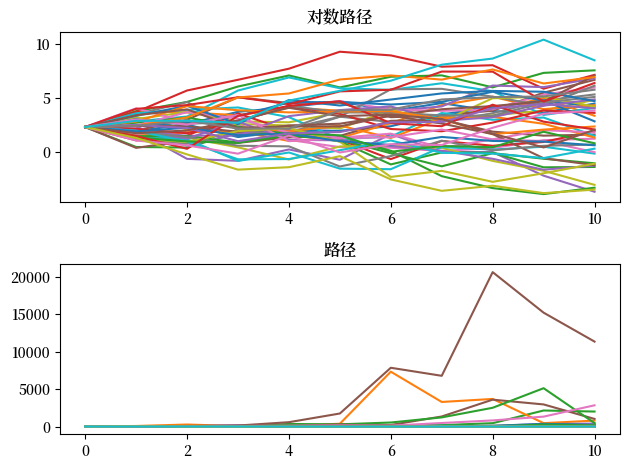

In [15]:
fig, axes = plt.subplots(2, 1)

titles = '对数路径', '路径'
transforms = np.log, lambda x: x
for ax, transform, title in zip(axes, transforms, titles):
    for i in range(50):
        path = simulate_asset_price_path()
        ax.plot(transform(path))
    ax.set_title(title)

fig.tight_layout()
plt.show()

### 计算价格

因为我们的模型更加复杂，我们难以轻易确定 $S_n$ 的分布。

所以为了计算期权的价格 $P$，我们使用蒙特卡洛方法。

我们计算每一次抽样 $S_n^1, \ldots, S_n^M$ 的平均值 $S_n$，并诉诸大数法则：

$$
    \mathbb E \max\{ S_n - K, 0 \}
    \approx
    \frac{1}{M} \sum_{m=1}^M \max \{S_n^m - K, 0 \}
$$

以下版本借助了Python 循环。

In [16]:
def compute_call_price(β=default_β,
                       μ=default_μ,
                       S0=default_S0,
                       h0=default_h0,
                       K=default_K,
                       n=default_n,
                       ρ=default_ρ,
                       ν=default_ν,
                       M=10_000):
    current_sum = 0.0
    # 对每一个样本路径
    for m in range(M):
        s = np.log(S0)
        h = h0
        # 模拟时间前进
        for t in range(n):
            s = s + μ + np.exp(h) * randn()
            h = ρ * h + ν * randn()
        # 并将值 max{S_n - K, 0} 加到 current_sum
        current_sum += np.maximum(np.exp(s) - K, 0)

    return β**n * current_sum / M

In [17]:
%%time
compute_call_price()

CPU times: user 189 ms, sys: 0 ns, total: 189 ms
Wall time: 189 ms


845.3358908717971

## 练习

```{exercise}
:label: monte_carlo_ex1

我们想要在上面的代码中增加 $M$，使得计算更加精确。

但是这存在问题，因为这让Python循环运行速度十分缓慢。

你的任务是使用NumPy编写一个更快的版本。
```

```{solution-start} monte_carlo_ex1
:class: dropdown
```

In [18]:
def compute_call_price_vector(β=default_β,
                       μ=default_μ,
                       S0=default_S0,
                       h0=default_h0,
                       K=default_K,
                       n=default_n,
                       ρ=default_ρ,
                       ν=default_ν,
                       M=10_000):

    s = np.full(M, np.log(S0))
    h = np.full(M, h0)
    for t in range(n):
        Z = np.random.randn(2, M)
        s = s + μ + np.exp(h) * Z[0, :]
        h = ρ * h + ν * Z[1, :]
    expectation = np.mean(np.maximum(np.exp(s) - K, 0))

    return β**n * expectation

In [19]:
%%time
compute_call_price_vector()

CPU times: user 5.69 ms, sys: 0 ns, total: 5.69 ms
Wall time: 5.14 ms


655.7138681467914

注意到，这个版本的速度比使用Python循环的版本要快。

现在让我们尝试更大的$M$以获得更准确的计算。

In [20]:
%%time
compute_call_price(M=10_000_000)

CPU times: user 3min 10s, sys: 26.7 ms, total: 3min 10s
Wall time: 3min 10s


833.0871500287351

```{solution-end}
```

```{exercise}
:label: monte_carlo_ex2

设想一种欧式看涨期权，该期权的标的资产现货价格为100美元，有一个120美元的敲出障碍。

这种期权在各方面都类似于普通的欧式看涨期权，但是，一旦标的资产现货价格超过120美元，期权便会被"敲出"，合约即刻失效。

注意，如果现货价格再次跌破120美元，期权不会重新激活。

使用在{eq}`s_mc_dyms`问题中定义的动态，定价这个欧式看涨期权。
```

```{solution-start} monte_carlo_ex2
:class: dropdown
```

In [21]:
default_μ  = 0.0001
default_ρ  = 0.1
default_ν  = 0.001
default_S0 = 10
default_h0 = 0
default_K = 100
default_n = 10
default_β = 0.95
default_bp = 120

In [22]:
def compute_call_price_with_barrier(β=default_β,
                                    μ=default_μ,
                                    S0=default_S0,
                                    h0=default_h0,
                                    K=default_K,
                                    n=default_n,
                                    ρ=default_ρ,
                                    ν=default_ν,
                                    bp=default_bp,
                                    M=50_000):
    current_sum = 0.0
    # 对每个样本路径进行模拟
    for m in range(M):
        s = np.log(S0)
        h = h0
        payoff = 0
        option_is_null = False
        # 模拟时间发展
        for t in range(n):
            s = s + μ + np.exp(h) * randn()
            h = ρ * h + ν * randn()
            if np.exp(s) > bp:
                payoff = 0
                option_is_null = True
                break

        if not option_is_null:
            payoff = np.maximum(np.exp(s) - K, 0)
        # 将payoff加入到current_sum中
        current_sum += payoff

    return β**n * current_sum / M

In [23]:
%time compute_call_price_with_barrier()

CPU times: user 1.12 s, sys: 0 ns, total: 1.12 s
Wall time: 1.12 s


0.04124545920795359

再看向量化版本，这比使用Python循环快。

In [24]:
def compute_call_price_with_barrier_vector(β=default_β,
                                           μ=default_μ,
                                           S0=default_S0,
                                           h0=default_h0,
                                           K=default_K,
                                           n=default_n,
                                           ρ=default_ρ,
                                           ν=default_ν,
                                           bp=default_bp,
                                           M=50_000):
    s = np.full(M, np.log(S0))
    h = np.full(M, h0)
    option_is_null = np.full(M, False)
    for t in range(n):
        Z = np.random.randn(2, M)
        s = s + μ + np.exp(h) * Z[0, :]
        h = ρ * h + ν * Z[1, :]
        # 标记所有股价高于敲出障碍价格的期权为无效
        option_is_null = np.where(np.exp(s) > bp, True, option_is_null)

    # 在option_is_null的索引处将payoff标记为0
    payoff = np.where(option_is_null, 0, np.maximum(np.exp(s) - K, 0))
    expectation = np.mean(payoff)
    return β**n * expectation

In [25]:
%time compute_call_price_with_barrier_vector()

CPU times: user 27.4 ms, sys: 999 μs, total: 28.4 ms
Wall time: 27.9 ms


0.03703724478844379

```{solution-end}
```